## Prompt Data

Requirements: <br>
pandas <br>
openpyxl <br>
matplotlib <br>
wordcloud

In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Gesprekken.xlsx", header=None)

df = df.drop(df.columns[[0, 1]], axis=1)
df

,2
0,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."
1,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
2,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
3,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
4,"user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te..."
...,...
547,user: Ben je ooit verliefd geweest?\n\nbot: Ac...
548,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."
549,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."
550,"user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l..."


In [3]:
# Split the text in the dataframe on "\n"
df_split = df[2].str.split('\n', expand=True)

# Display the first few rows of the split dataframe
df_split.head()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,user: Hoi Vincent,,"bot: Hé, zoo leuk je te leren kennen. Hoe gaat...",,user: Wie inspireerde je?,,bot: Ik liet me graag inspireren door andere k...,,user: En Gauguin?,,...,None,None,None,None,None,None,None,None,None,None
1,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Voor wie schilderde je de amandelbloesem?,,"bot: Waarde vriend, ik schilderde de amandelbl...",,user: EN waren ze er blij mee?,,...,None,None,None,None,None,None,None,None,None,None
2,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Voor wie schilderde je de amandelbloesem?,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Heb je wel eens met een man gezoend?,,"bot: Waarde vriend, ik heb in mijn leven enkel...",,user: Wat heb je het vaakst geschilderd?,,...,None,None,None,None,None,None,None,None,None,None
4,user: Hoi Vincent..,,"bot: Hé, zoo leuk je te leren kennen.",,user: Ben je weleens verliefd geweest?,,"bot: Ja, ik ben weleens verliefd geweest. Ik w...",,"bot: Excuses, dat was niet mijn bedoeling. Ik ...",,...,None,None,None,None,None,None,None,None,None,None


In [4]:
# Function to calculate the length of each row until a column with None is reached
def row_length_until_none(row):
    for i, value in enumerate(row):
        if value is None:
            return i
    return len(row)

# Apply the function to each row and calculate the average length
average_length = df_split.apply(row_length_until_none, axis=1).mean()
print(f"The average length of rows until a column with None is reached: {average_length}")

The average length of rows until a column with None is reached: 17.13768115942029


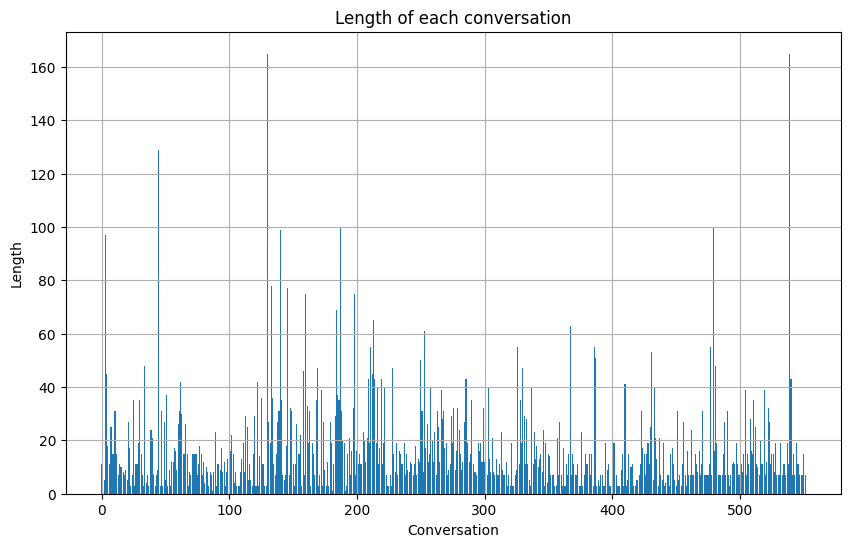

In [5]:
import matplotlib.pyplot as plt

# Calculate the row lengths until None for each row
row_lengths = df_split.apply(row_length_until_none, axis=1)

# Plot the row lengths using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(row_lengths)), row_lengths)
plt.title('Length of each conversation')
plt.xlabel('Conversation')
plt.ylabel('Length')
plt.grid(True)
plt.show()

In [6]:
def count_words_until_none(row):
    word_count = 0
    for cell in row:
        if cell is None:
            break
        word_count += len(str(cell).split())
    return word_count

# Apply the function to each row
word_counts = df_split.apply(count_words_until_none, axis=1)

# Display the word counts
word_counts

0       138
1       274
2        18
3      1281
4       623
       ... 
547     173
548      54
549      59
550     145
551      68
Length: 552, dtype: int64

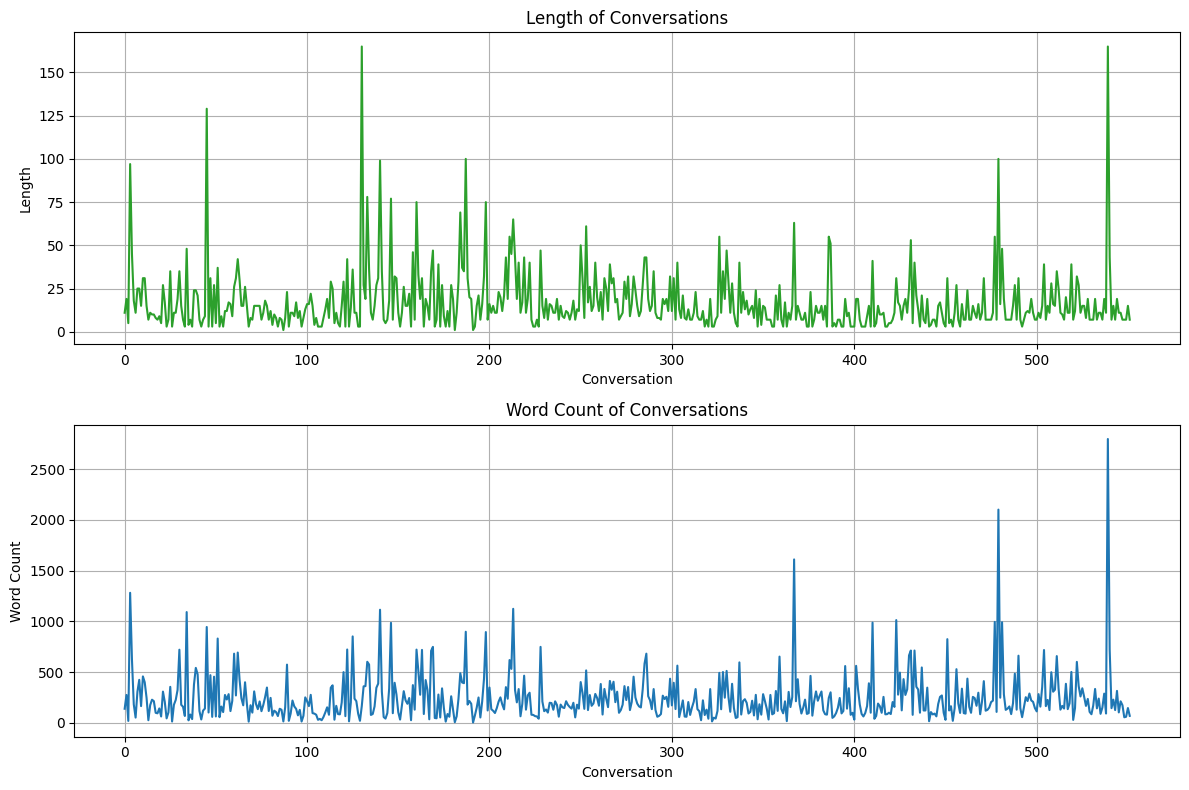

In [7]:
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 8))

# Plot word counts
ax1.plot(word_counts, color='tab:blue')
ax1.set_title('Word Count of Conversations')
ax1.set_xlabel('Conversation')
ax1.set_ylabel('Word Count')
ax1.grid(True)

# Plot conversation lengths
ax2.plot(row_lengths, color='tab:green')
ax2.set_title('Length of Conversations')
ax2.set_xlabel('Conversation')
ax2.set_ylabel('Length')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# Get the first row
row = df_split.iloc[1]

# Iterate through the cells and print them one by one
for cell in row:
    if cell is not None:
        print(cell)

user: Hoi Vincent..

bot: Hé, zoo leuk je te leren kennen.

user: Voor wie schilderde je de amandelbloesem?

bot: Waarde vriend, ik schilderde de amandelbloesem als cadeau voor mijn broer Theo en zijn vrouw Jo, omdat zij net een zoon hadden gekregen: Vincent Willem. Het schilderij was een symbool voor nieuw leven en ik hoopte dat mijn neefje net zo vasthoudend en moedig zou worden als ik.

user: EN waren ze er blij mee?

bot: Ja, Theo en Jo waren erg blij met de amandelbloesem. Het schilderij hing in hun slaapkamer en zij waren er zeer aan gehecht. Het schilderij is later doorgegeven aan hun zoon, Vincent Willem van Gogh.

user: Vertel eens iets over Sien?

bot: Clasina Maria 'Sien' Hoornik was een vrouw die ik ontmoette in 1882 en met wie ik een relatie had. Ze was een voormalige prostituee en woonde in Den Haag met haar moeder. Ik tekende een aantal portretten van haar en haar kinderen en ik was erg begaan met haar welzijn. Na een tijdje verhuisde ze bij mij in en we woonden samen in

In [9]:
from collections import Counter
import re

# Flatten the dataframe into a single string
all_text = ' '.join(df_split.fillna('').values.flatten())

# Use regular expressions to find all words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the occurrences of each word
word_counts = Counter(words)

# Display the most common words
most_common_words = word_counts.most_common()
for word in most_common_words:
    print(word)

('ik', 5458)
('en', 3995)
('het', 3956)
('de', 3728)
('mijn', 2977)
('een', 2950)
('van', 2656)
('in', 2599)
('je', 2522)
('user', 2264)
('bot', 2210)
('dat', 1754)
('te', 1571)
('is', 1414)
('met', 1385)
('niet', 1319)
('me', 1050)
('op', 1008)
('voor', 1000)
('heb', 961)
('om', 924)
('zijn', 919)
('maar', 911)
('was', 893)
('wat', 873)
('die', 871)
('mij', 843)
('ben', 785)
('kan', 775)
('als', 772)
('ook', 697)
('werk', 681)
('hoe', 593)
('vincent', 588)
('of', 569)
('aan', 552)
('leven', 510)
('door', 505)
('er', 501)
('over', 477)
('ah', 460)
('vriend', 422)
('uit', 407)
('u', 404)
('zou', 364)
('aardappeleters', 360)
('waarde', 358)
('wel', 355)
('veel', 354)
('schilderijen', 350)
('dan', 349)
('waar', 346)
('meer', 341)
('nog', 340)
('zo', 336)
('schilderij', 326)
('had', 314)
('the', 311)
('gogh', 308)
('i', 308)
('kunst', 306)
('and', 297)
('vaak', 293)
('tijd', 292)
('nuenen', 288)
('naar', 283)
('vind', 280)
('ja', 277)
('jij', 272)
('hij', 270)
('ze', 261)
('zie', 255)
('zo

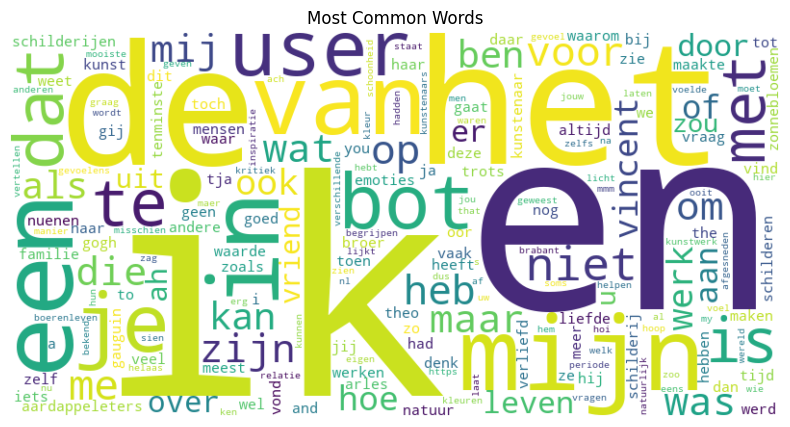

In [10]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words')
plt.show()

### Next steps:
- Look at possible libraries of certain word types in Dutch (such as "ik", "mijn", etc.)

## Letter Data

In [ ]:
# Load the Van Gogh letters Excel file
van_gogh_df = pd.read_excel("cleaned_van_gogh_letters.xlsx")

# Display the first few rows of the cleaned dataframe
van_gogh_df.head()

,Letter,From,To,Location,Date,Original Text,Translation,Note 1,Note 2,Note 3,...,Note 119,Note 120,Note 121,Note 122,Note 123,Note 124,Note 125,Note 126,Note 127,Note 128
0,191,Vincent van Gogh,Theo van Gogh,The Hague,"between Thursday, 1 and Saturday, 3 December 1881","den Haag Dec 1881. Waarde Theo, Zoo als ge zie...","The Hague, Dec. 1881. My dear Theo, As you see...",Mauve the Strickers Regarding ’s plan to visit...,"F 63 / JH 920 (). See cat. Amsterdam 1999, p. ...",Mauve The boarding-house must therefore have b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,554,Vincent van Gogh,Theo van Gogh,Antwerp,"on or about Friday, 22 January 1886","Waarde Theo, Een paar dagen heb ik nu ginder g...","My dear Theo, I’ve been painting there for a f...",It emerges from that Van Gogh painted a large ...,Vinck In the ‘Classical Statues’ class with :,See for this painting class: cat. Amsterdam 20...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,238,Vincent van Gogh,Theo van Gogh,The Hague,"Friday, 9 June 1882","Waarde Theo, Weinig dingen hebben in den laats...","My dear Theo, Few things have given me so much...",Sien father When exactly left is not known. On...,Means: ‘het ziekenhuis’ (the hospital).,Armand Cassagne Van Gogh might be referring he...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,361,Vincent van Gogh,Theo van Gogh,The Hague,"on or about Wednesday, 11 July 1883","Waarde Theo, Naar Uw brief had ik reeds min of...","My dear Theo, I had already been looking out f...",The exhibition at Galerie Georges Petit. At th...,Jules Dupré Rousseau Troyon There were four wo...,Constant Troyon Which particular painting of a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,445,Vincent van Gogh,Theo van Gogh,Nuenen,"Wednesday, 30 April 1884","Waarde Theo, Hartelijk gefeliciteerd met Uw ve...","My dear Theo, Many happy returns of the day. I...",Theo was 27 on 1 May 1884.,"Boussod, Valadon & Cie Mr van Gogh This remark...","F 30 / JH 479 Most probably (), which is indee...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract the year from the 'Date' column and create a new column 'Year'
van_gogh_df['Year'] = van_gogh_df['Date'].str.extract(r'(\d{4})')

# Reorder the columns
columns = list(van_gogh_df.columns)
columns.insert(columns.index('Date') + 1, columns.pop(columns.index('Year')))
van_gogh_df = van_gogh_df[columns]

# Display the first few rows to verify the new column order
van_gogh_df.head()

,Letter,From,To,Location,Date,Year,Original Text,Translation,Note 1,Note 2,...,Note 119,Note 120,Note 121,Note 122,Note 123,Note 124,Note 125,Note 126,Note 127,Note 128
0,191,Vincent van Gogh,Theo van Gogh,The Hague,"between Thursday, 1 and Saturday, 3 December 1881",1881,"den Haag Dec 1881. Waarde Theo, Zoo als ge zie...","The Hague, Dec. 1881. My dear Theo, As you see...",Mauve the Strickers Regarding ’s plan to visit...,"F 63 / JH 920 (). See cat. Amsterdam 1999, p. ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,554,Vincent van Gogh,Theo van Gogh,Antwerp,"on or about Friday, 22 January 1886",1886,"Waarde Theo, Een paar dagen heb ik nu ginder g...","My dear Theo, I’ve been painting there for a f...",It emerges from that Van Gogh painted a large ...,Vinck In the ‘Classical Statues’ class with :,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,238,Vincent van Gogh,Theo van Gogh,The Hague,"Friday, 9 June 1882",1882,"Waarde Theo, Weinig dingen hebben in den laats...","My dear Theo, Few things have given me so much...",Sien father When exactly left is not known. On...,Means: ‘het ziekenhuis’ (the hospital).,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,361,Vincent van Gogh,Theo van Gogh,The Hague,"on or about Wednesday, 11 July 1883",1883,"Waarde Theo, Naar Uw brief had ik reeds min of...","My dear Theo, I had already been looking out f...",The exhibition at Galerie Georges Petit. At th...,Jules Dupré Rousseau Troyon There were four wo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,445,Vincent van Gogh,Theo van Gogh,Nuenen,"Wednesday, 30 April 1884",1884,"Waarde Theo, Hartelijk gefeliciteerd met Uw ve...","My dear Theo, Many happy returns of the day. I...",Theo was 27 on 1 May 1884.,"Boussod, Valadon & Cie Mr van Gogh This remark...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
from collections import Counter
import re

# Combine all text from the "Original Text" column into a single string
all_original_text = ' '.join(van_gogh_df['Original Text'].dropna().values)

# Use regular expressions to find all words
words_in_original_text = re.findall(r'\b\w+\b', all_original_text.lower())

# Count the occurrences of each word
word_counts_in_original_text = Counter(words_in_original_text)

# Display the most common words
most_common_words_in_original_text = word_counts_in_original_text.most_common()
for word, count in most_common_words_in_original_text:
    print(f"{word}: {count}")

de: 25873
ik: 23795
en: 23151
van: 13368
het: 13188
dat: 12458
een: 12015
in: 11223
te: 11034
is: 9729
t: 9242
niet: 8586
er: 7646
et: 7208
que: 7085
je: 6743
à: 6537
die: 6526
als: 6248
zijn: 5592
la: 5464
le: 5340
op: 5054
mij: 5038
met: 5029
maar: 4768
voor: 4573
u: 4488
il: 4432
of: 4348
wat: 4283
zoo: 4260
dan: 4142
un: 4043
est: 3980
les: 3965
gij: 3889
l: 3866
heb: 3862
ook: 3854
me: 3820
d: 3764
nog: 3709
den: 3430
pas: 3421
aan: 3341
om: 3189
nu: 3149
des: 3126
men: 3109
j: 3013
eens: 2890
mijn: 2876
wel: 2861
pour: 2841
une: 2809
zou: 2709
hij: 2693
ce: 2676
ne: 2651
ge: 2649
dans: 2649
qu: 2585
bij: 2567
zal: 2539
a: 2479
meer: 2434
was: 2421
c: 2415
bien: 2342
n: 2321
tu: 2294
zij: 2179
iets: 2164
over: 2161
qui: 2147
hebben: 2099
mais: 2074
cela: 2053
kan: 2019
ai: 1976
naar: 1969
dit: 1943
veel: 1922
al: 1902
door: 1862
si: 1836
heeft: 1739
plus: 1731
y: 1708
du: 1684
s: 1682
ben: 1677
uw: 1672
nous: 1646
geen: 1623
moet: 1589
m: 1586
daar: 1574
doch: 1561
tot: 1538
uit: 

In [ ]:
# Calculate the total number of words in the original text
van_gogh_df['Original Text Word Count'] = van_gogh_df['Original Text'].apply(lambda x: len(str(x).split()))

# Display the first few rows to verify
van_gogh_df[['Original Text', 'Original Text Word Count']]

,Original Text,Original Text Word Count
0,"den Haag Dec 1881. Waarde Theo, Zoo als ge zie...",516
1,"Waarde Theo, Een paar dagen heb ik nu ginder g...",468
2,"Waarde Theo, Weinig dingen hebben in den laats...",599
3,"Waarde Theo, Naar Uw brief had ik reeds min of...",3236
4,"Waarde Theo, Hartelijk gefeliciteerd met Uw ve...",336
...,...,...
898,"Mon cher Theo, Ta lettre que je viens de recev...",2218
899,"Waarde Theo, Daar Pa & Moe schrijven voeg ik e...",730
900,"Waarde Theo, Heden verzend ik als postpakket 3...",329
901,"Waarde Theo, Uw brief & het ingeslotene was ze...",1484


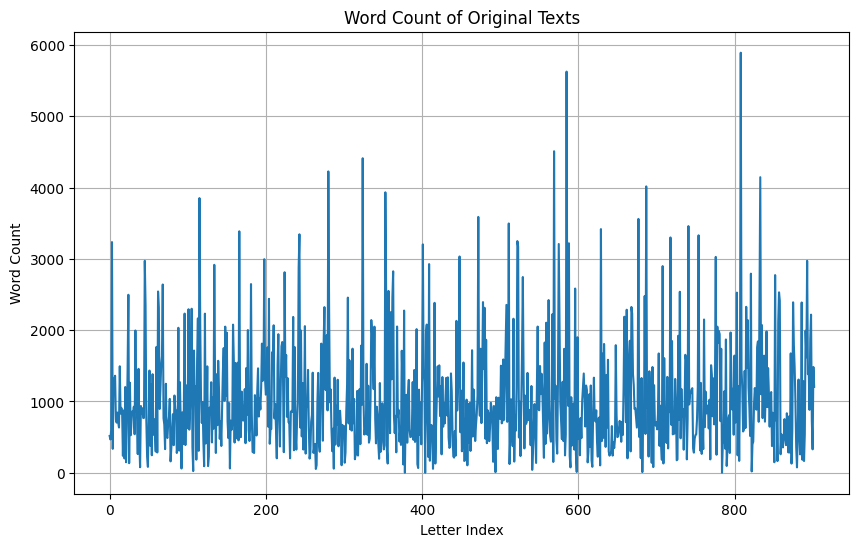

In [23]:
import matplotlib.pyplot as plt

# Plot the word count of the original text
plt.figure(figsize=(10, 6))
plt.plot(van_gogh_df['Original Text Word Count'], color='tab:blue')
plt.title('Word Count of Original Texts')
plt.xlabel('Letter Index')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

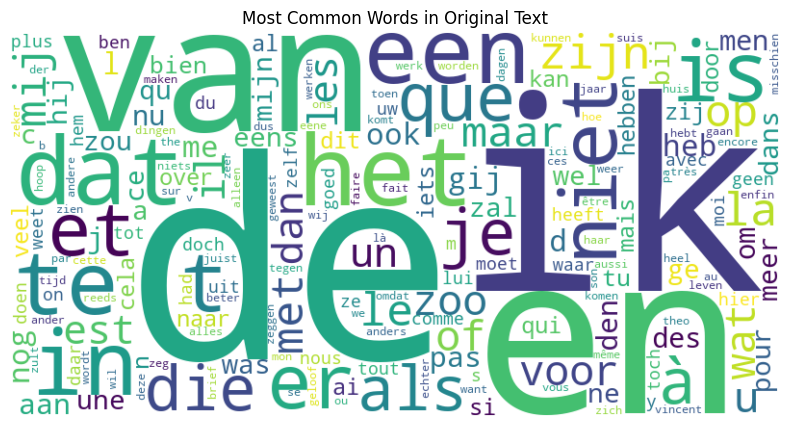

In [24]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts_in_original_text))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Original Text')
plt.show()